# MDIS-2019 - Ridgecrest July 2019 event analysis

## 03.1 Interferogram data processing data pipeline exploitation

This notebook monitors the progress of the DIAPASON data processing pipeline and shows how to discover the results.

In [166]:
import pandas as pd
import cioppy
import time
import os
import sys
sys.path.append(os.getcwd())
from mdis_2019_ridgecrest_helpers import *
from shapely.geometry import box
from shapely.wkt import loads
import gdal
import osr
from urlparse import urlparse
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

gdal.UseExceptions()

%store -r
%matplotlib inline

Load the serialized data items catalogue references:


In [42]:
data_items = pd.read_pickle('diapason.pkl')

In [43]:
data_items

self
0  https://catalog.terradue.com/fbrito/search?uid...
1  https://catalog.terradue.com/fbrito/search?uid...
2  https://catalog.terradue.com/fbrito/search?uid...

Add the columns for storing the status and link to the results:

In [54]:
data_items['status'] = ''
data_items['link_results'] = ''

In [55]:
data_items

self status link_results
0  https://catalog.terradue.com/fbrito/search?uid...                    
1  https://catalog.terradue.com/fbrito/search?uid...                    
2  https://catalog.terradue.com/fbrito/search?uid...

Monitor the status of each of the data items:

In [101]:
creds = ':'.join([username, api_key])

while not ((len(data_items['status'].unique()) == 1) and (str(data_items['status'].unique()[0]) == 'source-out')):
    
    data_items.update(data_items.apply(lambda row: check_status(row, creds), axis=1))
    
    print data_items['status'].unique()
   
    time.sleep(120)

If the status is *source-out*, the data items have now a link pointing to the results:

In [102]:
data_items

self      status  \
0  https://catalog.terradue.com/fbrito/search?uid...  source-out   
1  https://catalog.terradue.com/fbrito/search?uid...  source-out   
2  https://catalog.terradue.com/fbrito/search?uid...  source-out   

                                        link_results  
0  https://catalog.terradue.com/fbrito/cat/e85046...  
1  https://catalog.terradue.com/fbrito/cat/5f06bb...  
2  https://catalog.terradue.com/fbrito/cat/01835e...

For each data item, use the link:results to discover what has been produced.

Aggregate all results in a single Pandas data frame:

In [133]:
results = pd.DataFrame()

for index, row in data_items.iterrows():
    
    tmp_results = pd.DataFrame.from_dict(cioppy.Cioppy().search(end_point=row.link_results, 
                                                                params=[],
                                                                output_fields='self,identifier,enclosure,title,link:results',
                                                                model='GeoTime',
                                                                creds=creds))
    
    if index == 0:
        results = tmp_results
    else:
        results = pd.concat([results, tmp_results])
    

In [134]:
results

enclosure  \
0  https://store.terradue.com/fbrito/_results/wor...   
1  https://store.terradue.com/fbrito/_results/wor...   
2  https://store.terradue.com/fbrito/_results/wor...   
3  https://store.terradue.com/fbrito/_results/wor...   
4  https://store.terradue.com/fbrito/_results/wor...   
0  https://store.terradue.com/fbrito/_results/wor...   
1  https://store.terradue.com/fbrito/_results/wor...   
2  https://store.terradue.com/fbrito/_results/wor...   
3  https://store.terradue.com/fbrito/_results/wor...   
4  https://store.terradue.com/fbrito/_results/wor...   
0  https://store.terradue.com/fbrito/_results/wor...   
1  https://store.terradue.com/fbrito/_results/wor...   
2  https://store.terradue.com/fbrito/_results/wor...   
3  https://store.terradue.com/fbrito/_results/wor...   
4  https://store.terradue.com/fbrito/_results/wor...   

                                 identifier  \
0  07ED92B9CC6A1010FF8F2E6E74B6DDEDD0C1D96E   
1  28CF1B5225474D292740E6BB7D20290FA180694B   
2  40CBE8E5A13005C53D1607E1E029251FB3B1CC74   
3  853AA091665EF26D0E4D13F34B80C60FA4984F05   
4  B2FFF275D9176A5A5E74C0AE75DD944947CDCC84   
0  15EE114EDCBDC25360A46AECA153054366BCE909   
1  29215D5F38A9C7322BED5FFF2819E5A7375072BA   
2  A9D6D111F83BE62CEE155FDAE563859D5C7A7837   
3  E1CD5DF77803BCD7B10F1F527C3C8343CD36573E   
4  EDB65558855DA6E236DD90EB8D6C61D5E221B77B   
0  1319AFCFC2213C0E48D171987268572A4582B830   
1  325BBC25F00327B72DADA9955626AF973879D6E5   
2  4277582900D089D32C04323D51B5F06034C5D09E   
3  64B8A09C48EA76E80C0537502FDAD001C30BB215   
4  EA3EAB4D5A8E04FBD5FF442567A712B76DA02C5F   

                                        link:results  \
0  https://catalog.terradue.com/fbrito/search?uid...   
1  https://catalog.terradue.com/fbrito/search?uid...   
2  https://catalog.terradue.com/fbrito/search?uid...   
3  https://catalog.terradue.com/fbrito/search?uid...   
4  https://catalog.terradue.com/fbrito/search?uid...   
0  https://catalog.terradue.com/fbrito/search?uid...   
1  https://catalog.terradue.com/fbrito/search?uid...   
2  https://catalog.terradue.com/fbrito/search?uid...   
3  https://catalog.terradue.com/fbrito/search?uid...   
4  https://catalog.terradue.com/fbrito/search?uid...   
0  https://catalog.terradue.com/fbrito/search?uid...   
1  https://catalog.terradue.com/fbrito/search?uid...   
2  https://catalog.terradue.com/fbrito/search?uid...   
3  https://catalog.terradue.com/fbrito/search?uid...   
4  https://catalog.terradue.com/fbrito/search?uid...   

                                                self  \
0  https://catalog.terradue.com//fbrito/cat/e8504...   
1  https://catalog.terradue.com//fbrito/cat/e8504...   
2  https://catalog.terradue.com//fbrito/cat/e8504...   
3  https://catalog.terradue.com//fbrito/cat/e8504...   
4  https://catalog.terradue.com//fbrito/cat/e8504...   
0  https://catalog.terradue.com//fbrito/cat/5f06b...   
1  https://catalog.terradue.com//fbrito/cat/5f06b...   
2  https://catalog.terradue.com//fbrito/cat/5f06b...   
3  https://catalog.terradue.com//fbrito/cat/5f06b...   
4  https://catalog.terradue.com//fbrito/cat/5f06b...   
0  https://catalog.terradue.com//fbrito/cat/01835...   
1  https://catalog.terradue.com//fbrito/cat/01835...   
2  https://catalog.terradue.com//fbrito/cat/01835...   
3  https://catalog.terradue.com//fbrito/cat/01835...   
4  https://catalog.terradue.com//fbrito/cat/01835...   

                                               title  
0  DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Unwr...  
1  DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Inte...  
2  DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Inte...  
3  DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Inte...  
4                                           logs.zip  
0  DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Inte...  
1  DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Inte...  
2  DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Unwr...  
3                                           logs.zip  
4  DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Inte

Now plot the unwrapped phase around the event:

In [135]:
eq_id = 'ci38457511'

search_eq = EarthQuakes()

search_eq.search_id('ci38457511')

search_eq.earthquakes[0].pgv_aoi.wkt

'POLYGON ((-116.8605389899152 35.0580755365578, -116.8605389899152 36.10477822072549, -117.9175550338945 36.10477822072549, -117.9175550338945 35.0580755365578, -116.8605389899152 35.0580755365578))'

In [140]:
list(search_eq.earthquakes[0].pgv_aoi.bounds)

[-117.91755503389453, 35.0580755365578, -116.86053898991524, 36.10477822072549]

In [142]:
def get_vsi_url(enclosure, username, api_key):
    
    
    parsed_url = urlparse(enclosure)

    url = '/vsicurl/%s://%s:%s@%s/api%s' % (list(parsed_url)[0],
                                            user, 
                                            api_key, 
                                            list(parsed_url)[1],
                                            list(parsed_url)[2])
    
    return url 



In [164]:
def vsi_download(row, bbox, username, api_key):
    
    vsi_url = get_vsi_url(row.enclosure, username, api_key)
    
    ulx, uly, lrx, lry = bbox[0], bbox[3], bbox[2], bbox[1] 
    
    # load VSI URL in memory
    output = '/vsimem/subset.tif'
    
    ds = gdal.Open(vsi_url)
    
    ds = gdal.Translate(destName=output, 
                        srcDS=ds, 
                        projWin = [ulx, uly, lrx, lry], 
                        projWinSRS = 'EPSG:4326',
                        outputType=gdal.GDT_Float32)
    ds = None
    
    # create a numpy array
    ds = gdal.Open(output)
    
    layers = []

    for i in range(1, ds.RasterCount+1):
        layers.append(ds.GetRasterBand(i).ReadAsArray())

    return np.dstack(layers)



In [196]:
results[results.title.str.contains('Unwrap')]

enclosure  \
0  https://store.terradue.com/fbrito/_results/wor...   
2  https://store.terradue.com/fbrito/_results/wor...   
3  https://store.terradue.com/fbrito/_results/wor...   

                                 identifier  \
0  07ED92B9CC6A1010FF8F2E6E74B6DDEDD0C1D96E   
2  A9D6D111F83BE62CEE155FDAE563859D5C7A7837   
3  64B8A09C48EA76E80C0537502FDAD001C30BB215   

                                        link:results  \
0  https://catalog.terradue.com/fbrito/search?uid...   
2  https://catalog.terradue.com/fbrito/search?uid...   
3  https://catalog.terradue.com/fbrito/search?uid...   

                                                self  \
0  https://catalog.terradue.com//fbrito/cat/e8504...   
2  https://catalog.terradue.com//fbrito/cat/5f06b...   
3  https://catalog.terradue.com//fbrito/cat/01835...   

                                               title  
0  DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Unwr...  
2  DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Unwr...  
3  DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Unwr...

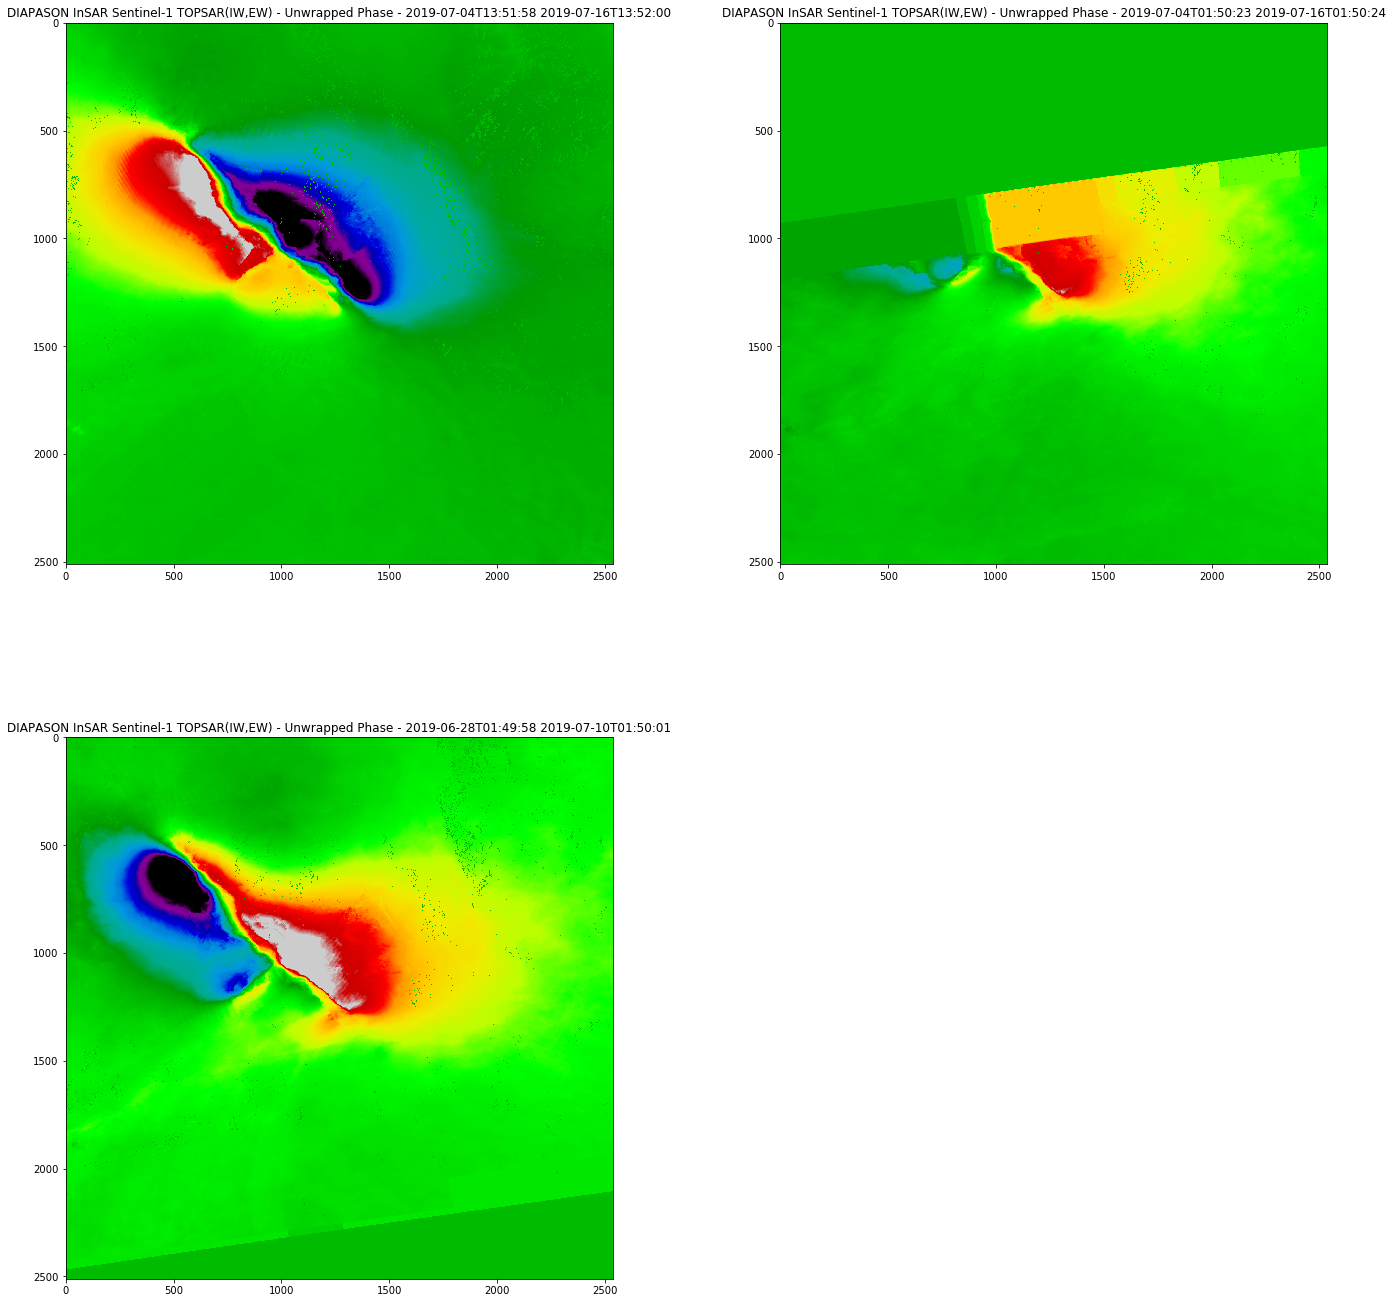

In [197]:
fig = plt.figure(figsize=(20,20))

i=1
for index, row in results[results.title.str.contains('Unwrap')].iterrows():
   
    img = vsi_download(row, 
                       list(search_eq.earthquakes[0].pgv_aoi.bounds), 
                       username, 
                       api_key)


    
    a=fig.add_subplot(2, 2, 0+i)
    imgplot = plt.imshow(img.reshape(img.shape[0],img.shape[1]),
                     cmap=plt.cm.spectral, 
                     vmin=-100,
                     vmax=100)
    a.set_title(row.title)
    i = i+1
        
plt.tight_layout()
fig = plt.gcf()
plt.show()

fig.clf()
plt.close()